# Assignment 2 - CT5120

### Instructions:
- Complete all the tasks below and upload your submission as a Python notebook on Blackboard with the filename “`StudentID_Lastname.ipynb`” before **23:59** on **November 25, 2022**.
- This is an individual assignment, you **must not** work with other students to complete this assessment.
- The assignment is worth $50$ marks and constitutes 19% of the final grade. The breakdown of the marking scheme for each task is as follows:

| Task | Marks for write-up | Marks for code | Total Marks |
| :--- | :----------------- | :------------- | :---------- |
| 1    |                  5 |              5 |          10 |
| 2    |                  - |             10 |          10 |
| 3    |                  5 |              5 |          10 |
| 4    |                  5 |              5 |          10 |
| 5    |                  5 |              5 |          10 |



---

This assignment involves tasks for feature engineering, training and evaluating a classifier for suggestion detection. You will work with the data from SemEval-2019 Task 9 subtask A to classify whether a piece of text contains a suggestion or not. 


Download train.csv, test_seen.csv and test_unseen.csv from the [Github](https://github.com/sharduls007/Assignment_2_CT5120) or uncomment the code cell below to get the data as a comma-separated values (CSV) file. The CSV file contains a header row followed by 5,440 rows in train.csv and 1,360 rows in test_seen.csv spread across 3 columns of data. Each row of data contains a unique id, a piece of text and a label assigned by an annotator. A label of $1$ indicates that the given text contains a suggestion while a label of $0$ indicates that the text does not contain a suggestion.

You can find more details about the dataset in Sections 1, 2, 3 and 4 of [SemEval-2019 Task 9: Suggestion Mining from Online Reviews and Forums
](https://aclanthology.org/S19-2151/).

We will be using test_seen.csv for benchmarking our model, hence it has label. On the other hand, test_unseen is used for [Kaggle](https://www.kaggle.com/competitions/nlp2022ct5120suggestionmining/overview) competition.


In [1]:
!curl "https://raw.githubusercontent.com/sharduls007/Assignment_2_CT5120/master/train.csv" > train.csv
!curl "https://raw.githubusercontent.com/sharduls007/Assignment_2_CT5120/master/test_seen.csv" > test.csv
!curl "https://raw.githubusercontent.com/sharduls007/Assignment_2_CT5120/master/test_unseen.csv" > test_unseen.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  670k  100  670k    0     0  1313k      0 --:--:-- --:--:-- --:--:-- 1316k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  168k  100  168k    0     0   546k      0 --:--:-- --:--:-- --:--:--  546k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  208k  100  208k    0     0   732k      0 --:--:-- --:--:-- --:--:--  732k


In [12]:
import numpy as np
import pandas as pd

# Read the CSV file.
train_df = pd.read_csv('train.csv', 
                 names=['id', 'text', 'label'], header=0)

test_df = pd.read_csv('test.csv', 
                 names=['id', 'text', 'label'], header=0)

# Store the data as a list of tuples where the first item is the text
# and the second item is the label.
train_texts, train_labels = train_df["text"].to_list(), train_df["label"].to_list() 
test_texts, test_labels = test_df["text"].to_list(), test_df["label"].to_list() 

# Check that training set and test set are of the right size.
assert len(test_texts) == len(test_labels) == 1360
assert len(train_texts) == len(train_labels) == 5440

---

## Task 1: Data Pre-processing (10 Marks)

Explain at least 3 steps that you will perform to preprocess the texts before training a classifier.



Edit this cell to write your answer below the line in no more than 300 words.

---

> Delete this line and your write answer here

---

In the code cell below, write an implementation of the steps you defined above. You are free to use a library such as `nltk` or `sklearn` for this task.

<AxesSubplot:xlabel='label', ylabel='count'>

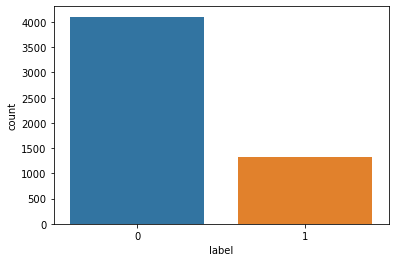

In [20]:
import seaborn as sns

sns.countplot(x = train_df['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

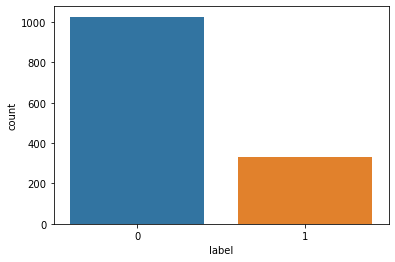

In [21]:
sns.countplot(x = test_df['label'])

---

## Task 2: Feature Engineering (I) - TF-IDF as features (10 Marks)

In the lectures we have seen that raw counts of words and `tf-idf` scores can be useful features for a classification task. Complete the following code cell to create a suggestion detector which uses `tf-idf` scores as features for a Naïve Bayes classifier.

After applying your preprocessing steps, use the training data to train the classifier and make predictions on the test set. You **must not** use the test set for training.

If everything is implemented correctly, then you should see a single floating point value between 0 and 1 at the end which denotes the accuracy of the classifier.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import GaussianNB

# Calculate tf-idf scores for the words in the training set.
# ... your code goes here



# Train a Naïve Bayes classifier using the tf-idf scores for words as features.
# ... your code goes here



# Predict on the test set.
predictions = []    # save your predictions on the test set into this list

# ... your code goes here



#################### DO NOT EDIT BELOW THIS LINE #################


#################### DO NOT EDIT BELOW THIS LINE #################

def accuracy(labels, predictions):
  '''
  Calculate the accuracy score for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''

  assert len(labels) == len(predictions)
  
  correct = 0
  for label, prediction in zip(labels, predictions):
    if label == prediction:
      correct += 1 
  
  score = correct / len(labels)
  return score

# Calculate accuracy score for the classifier using tf-idf features.
accuracy(test_labels, predictions)

AssertionError: 

---

## Task 3: Evaluation Metrics (10 marks)

Why is accuracy not the best measure for evaluating a classifier? Describe an evaluation metric which might work better than accuracy for a classification task such as suggestion detection.

Edit this cell to write your answer below the line in no more than 150 words.

---

> Delete this line and your write answer here

---

In the code cell below, write an implementation of the evaluation metric you defined above. Please write your own implementation from scratch.

In [ ]:
def evaluate(labels, predictions):
  '''
  Calculate an evaluation score other than accuracy for a given set of predictions and labels.
  
  Args:
    labels (list): A list containing gold standard labels annotated as `0` and `1`.
    predictions (list): A list containing predictions annotated as `0` and `1`.

  Returns:
    float: A floating point value to score the predictions against the labels.
  '''

  # check that labels and predictions are of same length
  assert len(labels) == len(predictions)

  score = 0.0
  
  #################### EDIT BELOW THIS LINE #########################

  # your code goes here


  #################### EDIT ABOVE THIS LINE #########################

  return score

# Calculate evaluation score based on the metric of your choice
# for the classifier trained in Task 2 using tf-idf features.
evaluate(test_labels, predictions)

---

## Task 4: Feature Engineering (II) - Other features (10 Marks)

Describe features other than those defined in Task 2 which might improve the performance of your suggestion detector. If these features require any additional pre-processing steps, then define those steps as well.


Edit this cell to write your answer below the line in no more than 500 words.

---

> Delete this line and your write answer here

---

In the code cell below, write an implementation of the features (and any additional pre-preprocessing steps) you defined above. You are free to use a library such as `nltk` or `sklearn` for this task.

After creating your features, use the training data to train a Naïve Bayes classifier and use the test set to evaluate its performance using the metric defined in Task 3. You **must not** use the test set for training.

To make sure that your code doesn't take too long to run or use too much memory, you can consider a time limit of 3 minutes and a memory limit of 12GB for this task.

In [ ]:
# Create your features.
# ... your code goes here



# Train a Naïve Bayes classifier using the features you defined.
# ... your code goes here



# Evaluate on the test set.
# ... your code goes here

---

## Task 5: Kaggle Competition (10 marks)

Head over to https://www.kaggle.com/t/1f90b74da0b7484da9647638e22d1068  
Use above classifier to predict the label for test_unseen.csv from competition page and upload the results to the leaderboard. The current baseline score is 0.36823. Make an improvement above the baseline. Please note that the evaluation metric for the competition is the f-score.

Read competition page for more details.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preparing submission for Kaggle
StudentID = "StudentID_Lastname" # Please add your student id and lastname
test_unseen = pd.read_csv("test_unseen.csv", names=['id', 'text'], header=0)

# Here Id is unique identifier assigned to each test sample ranging from test_0 till test_1699
# Expected is a list of prediction made by your classifier
sub = {"Id": [f"test_{i}" for i in range(len(test_unseen))],
       "Expected": []}

sub_df = pd.DataFrame(sub)
# The code below will generate a StudentID.csv on your drive on the left hand side in the explorer
# Please upload the file as a submission on the competition page
# You can index your submission StudentID_Lastname_index.csv, where index is your number of submission
sub_df.to_csv(f"{StudentID}.csv", sep=",", header=1, index=None)

Mention the approach that you have chosen briefly, and what is the mean average f-score that you have achieved? Did it improve above the chosen baseline model (0.36823)? Why or why not?

Edit this cell to write your answer below the line in no more than 500 words.

---

> Delete this line and your write answer here

---